In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene

In [5]:
df = pd.read_excel(r"/Users/shwetagupta/Downloads/Dental Hardness data.xlsx")

In [6]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [8]:
df.shape

(90, 5)

In [9]:
df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [10]:
#To visualise the realtionship between the two categorical varibales, we can plot a stcaked bar chart.
# a stackedbar chart, also known as a stacked bar graph,a graph that is used to break down and compare parts of whole.
# ach bar in thew chart represents a whole , and segments in the bar represent differnet parts or categories of that whole.Different colours are used to illustrate the different categories in the bar.

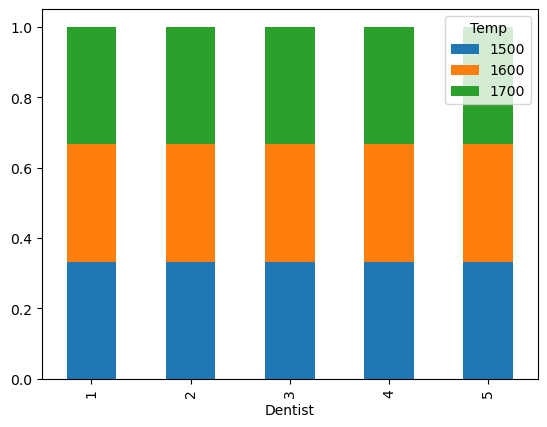

In [11]:
pd.crosstab(df['Dentist'], df['Temp'], normalize="index").plot(
    kind='bar',
    stacked=True)
plt.show()

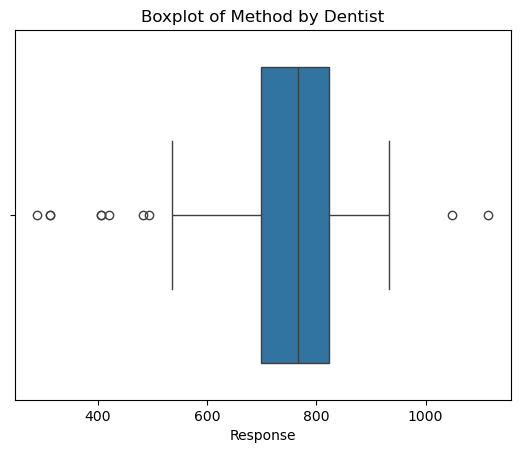

In [12]:
sns.boxplot(data=df, x="Response", hue=None)
plt.title("Boxplot of Method by Dentist")
plt.show()

In [13]:
# Data Preparation: Treat grouping factors as categorical
df["Dentist"]=pd.Categorical(df["Dentist"])
df["Method"]=pd.Categorical(df["Method"])
df["Alloy"]=pd.Categorical(df["Alloy"])
df["Temp"]=pd.Categorical(df["Temp"])

In [14]:
df

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
...,...,...,...,...,...
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405


In [20]:
# Split data by Alloy type
df_alloy1 = df[df['Alloy'] == 1].copy()
df_alloy2 = df[df['Alloy'] == 2].copy()

In [23]:
# ---------------------------------------------------------
# 4.1 How does the hardness of implants vary depending on dentists?
# ---------------------------------------------------------
print("--- 4.1 Analysis by Dentist ---")

for alloy_type in [1, 2]:
    print(f"\nAnalyzing Alloy {alloy_type} for Dentists:")
    subset = df[df['Alloy'] == alloy_type]
    
    # Groups for ANOVA
    groups = []
    for dentist in sorted(subset['Dentist'].unique()):
        groups.append(subset[subset['Dentist'] == dentist]['Response'])
    
    # Assumptions
    print("  Assumptions:")
    # Normality (Shapiro-Wilk)
    print("    Shapiro-Wilk Test for Normality:")
    for i, group in enumerate(groups):
        stat, p = stats.shapiro(group)
        print(f"      Dentist {i+1}: p-value = {p:.4f}")
    
    # Homogeneity of Variance (Levene)
    stat, p = stats.levene(*groups)
    print(f"    Levene's Test for Homogeneity of Variance: p-value = {p:.4f}")
    
    # Hypothesis Test (One-way ANOVA)
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"  One-way ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")
    
    # Post-hoc (Tukey HSD)
    if p_val < 0.05:
        print("  Significant difference found. Performing Tukey HSD:")
        tukey = pairwise_tukeyhsd(endog=subset['Response'], groups=subset['Dentist'], alpha=0.05)
        print(tukey)
    else:
        print("  No significant difference found.")

--- 4.1 Analysis by Dentist ---

Analyzing Alloy 1 for Dentists:
  Assumptions:
    Shapiro-Wilk Test for Normality:
      Dentist 1: p-value = 0.3255
      Dentist 2: p-value = 0.8415
      Dentist 3: p-value = 0.1295
      Dentist 4: p-value = 0.0533
      Dentist 5: p-value = 0.0813
    Levene's Test for Homogeneity of Variance: p-value = 0.2566
  One-way ANOVA results: F-statistic = 1.9771, p-value = 0.1166
  No significant difference found.

Analyzing Alloy 2 for Dentists:
  Assumptions:
    Shapiro-Wilk Test for Normality:
      Dentist 1: p-value = 0.2759
      Dentist 2: p-value = 0.5735
      Dentist 3: p-value = 0.5213
      Dentist 4: p-value = 0.0073
      Dentist 5: p-value = 0.3386
    Levene's Test for Homogeneity of Variance: p-value = 0.2369
  One-way ANOVA results: F-statistic = 0.5248, p-value = 0.7180
  No significant difference found.


In [18]:
# ---------------------------------------------------------
# 4.2 How does the hardness of implants vary depending on methods?
# ---------------------------------------------------------
print("\n\n--- 4.2 Analysis by Method ---")

for alloy_type in [1, 2]:
    print(f"\nAnalyzing Alloy {alloy_type} for Methods:")
    subset = df[df['Alloy'] == alloy_type]
    
    # Groups for ANOVA
    groups = []
    for method in sorted(subset['Method'].unique()):
        groups.append(subset[subset['Method'] == method]['Response'])
    
    # Assumptions
    print("  Assumptions:")
    # Normality (Shapiro-Wilk)
    print("    Shapiro-Wilk Test for Normality:")
    for i, group in enumerate(groups):
        stat, p = stats.shapiro(group)
        print(f"      Method {i+1}: p-value = {p:.4f}")
    
    # Homogeneity of Variance (Levene)
    stat, p = stats.levene(*groups)
    print(f"    Levene's Test for Homogeneity of Variance: p-value = {p:.4f}")
    
    # Hypothesis Test (One-way ANOVA)
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"  One-way ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")
    
    # Post-hoc (Tukey HSD)
    if p_val < 0.05:
        print("  Significant difference found. Performing Tukey HSD:")
        tukey = pairwise_tukeyhsd(endog=subset['Response'], groups=subset['Method'], alpha=0.05)
        print(tukey)
    else:
        print("  No significant difference found.")



--- 4.2 Analysis by Method ---

Analyzing Alloy 1 for Methods:
  Assumptions:
    Shapiro-Wilk Test for Normality:
      Method 1: p-value = 0.1820
      Method 2: p-value = 0.9030
      Method 3: p-value = 0.1425
    Levene's Test for Homogeneity of Variance: p-value = 0.0034
  One-way ANOVA results: F-statistic = 6.2633, p-value = 0.0042
  Significant difference found. Performing Tukey HSD:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------

Analyzing Alloy 2 for Methods:
  Assumptions:
    Shapiro-Wilk Test for Normality:
      Method 1: p-value = 0.7582
      Method 2: p-value = 0.0011
      Method 3: p-value = 0.1026
    Levene's Test fo

In [30]:
#4.3What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?"- Create Interaction Plot
#Inferences from the plot

from statsmodels.graphics.factorplots import interaction_plot

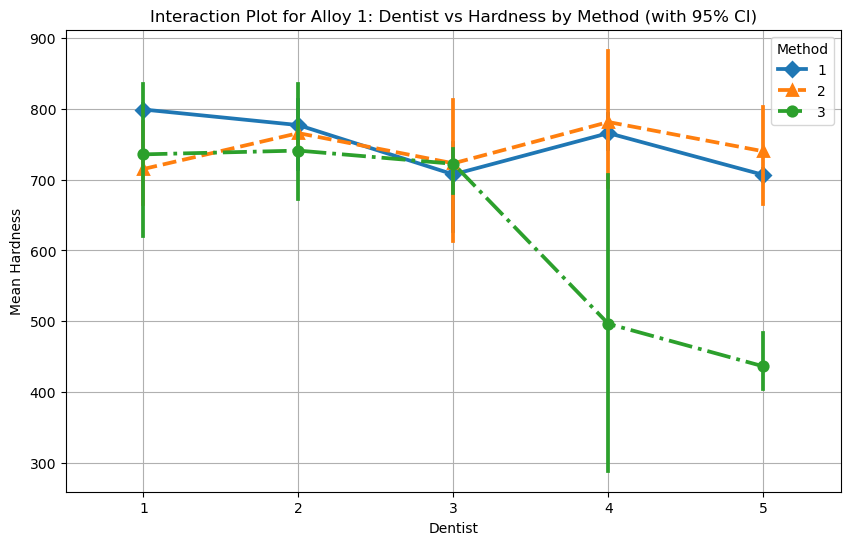

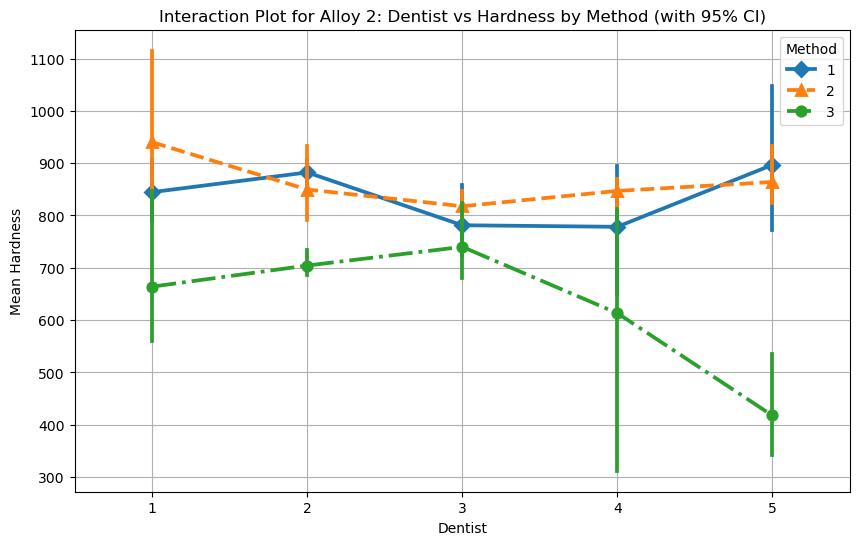

Plots saved and displayed (if running interactively).


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through both alloy types
for alloy in [1, 2]:
    subset = df[df['Alloy'] == alloy]
    
    plt.figure(figsize=(10, 6))
    
    # Generate the interaction plot using pointplot. 
    # By default, this shows the mean and the 95% Confidence Interval (CI).
    sns.pointplot(data=subset, x='Dentist', y='Response', hue='Method', 
                  markers=['D', '^', 'o'], linestyles=['-', '--', '-.'])
    
    # Set titles and labels
    plot_filename = f'interaction_plot_alloy_{alloy}_final.png'
    plt.title(f'Interaction Plot for Alloy {alloy}: Dentist vs Hardness by Method (with 95% CI)')
    plt.xlabel('Dentist')
    plt.ylabel('Mean Hardness')
    plt.grid(True)
    
    # 1. Save the plot to a file
    plt.savefig(plot_filename)
    
    # 2. Display the plot (Crucial step for interactive environments!)
    # If you are using a Jupyter Notebook/Lab, this step might be automatic,
    # but in a standard Python script, this is necessary to open the plot window.
    plt.show() 
    
    # Close the figure to free memory before the next iteration
    plt.close()

print("Plots saved and displayed (if running interactively).")

In [43]:
#4.4 How does the hardness of implants vary depending on dentists and methods together?


In [45]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ---------------------------------------------------------
# Two-Way ANOVA Analysis for Interaction (Dentist * Method)
# ---------------------------------------------------------

for alloy_type in [1, 2]:
    print(f"\n=========================================================================")
    print(f"Analysis for Alloy {alloy_type}: Interaction between Dentist and Method")
    print(f"=========================================================================")
    
    subset = df[df['Alloy'] == alloy_type].copy()
    
    # State Hypotheses
    print("\n1. Hypotheses (for Interaction Effect):")
    print("   Null Hypothesis (H0): There is no interaction between Dentist and Method on implant hardness.")
    print("   Alternate Hypothesis (Ha): There is an interaction between Dentist and Method on implant hardness.")
    
    # Conduct Hypothesis Test (Two-Way ANOVA)
    # C() ensures factors are treated as categorical
    formula = 'Response ~ C(Dentist) * C(Method)'
    model = ols(formula, data=subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # 3. ANOVA Results
    print("\n3. Two-Way ANOVA Results:")
    print(anova_table)
    
    # Extract the p-value for the interaction term (C(Dentist):C(Method))
    interaction_p_val = anova_table.loc['C(Dentist):C(Method)', 'PR(>F)']
    
    # 2. Check Assumptions using residuals
    print("\n2. Checking Assumptions (on model residuals):")
    residuals = model.resid
    
    # Normality (Shapiro-Wilk)
    stat_shapiro, p_shapiro = stats.shapiro(residuals)
    print(f"   Normality (Shapiro-Wilk) on Residuals: p-value = {p_shapiro:.4f}")
    
    # Homogeneity of Variances (Levene) on residuals grouped by interaction term
    subset['Interaction_Group'] = subset['Dentist'].astype(str) + ':' + subset['Method'].astype(str)
    groups_for_levene = []
    for group_name in subset['Interaction_Group'].unique():
        groups_for_levene.append(residuals[subset['Interaction_Group'] == group_name])
    
    stat_levene, p_levene = stats.levene(*groups_for_levene)
    print(f"   Homogeneity of Variances (Levene) on Residuals: p-value = {p_levene:.4f}")

    # 4. Conclusion
    print("\n4. Conclusion on Interaction:")
    if interaction_p_val < 0.05:
        print(f"   Since the interaction p-value ({interaction_p_val:.4f}) is less than 0.05, we REJECT the null hypothesis.")
        print("   Conclusion: There is a statistically significant interaction effect between Dentist and Method.")
        
        # 5. Identify differences (Post-hoc Tukey HSD)
        print("\n5. Identifying Significant Differences (Tukey HSD on Interaction Groups):")
        
        # Calculate Tukey HSD on the combined interaction groups
        tukey = pairwise_tukeyhsd(endog=subset['Response'], groups=subset['Interaction_Group'], alpha=0.05)
        print(tukey)
        
    else:
        print(f"   Since the interaction p-value ({interaction_p_val:.4f}) is greater than 0.05, we FAIL TO REJECT the null hypothesis.")
        print("   Conclusion: There is NO statistically significant interaction effect between Dentist and Method.")
        print("   5. Identifying Differences: Not necessary, as the overall interaction is not significant.")

print("\n--- Analysis Complete ---")


Analysis for Alloy 1: Interaction between Dentist and Method

1. Hypotheses (for Interaction Effect):
   Null Hypothesis (H0): There is no interaction between Dentist and Method on implant hardness.
   Alternate Hypothesis (Ha): There is an interaction between Dentist and Method on implant hardness.

3. Two-Way ANOVA Results:
                             sum_sq    df          F    PR(>F)
C(Dentist)            106683.688889   4.0   3.899638  0.011484
C(Method)             148472.177778   2.0  10.854287  0.000284
C(Dentist):C(Method)  185941.377778   8.0   3.398383  0.006793
Residual              205180.000000  30.0        NaN       NaN

2. Checking Assumptions (on model residuals):
   Normality (Shapiro-Wilk) on Residuals: p-value = 0.0902
   Homogeneity of Variances (Levene) on Residuals: p-value = 0.3128

4. Conclusion on Interaction:
   Since the interaction p-value (0.0068) is less than 0.05, we REJECT the null hypothesis.
   Conclusion: There is a statistically significant interac